# **Diseño de una Herramienta para la Detección de Arritmias Cardíacas en Electrocardiogramas utilizando Técnicas de Aprendizaje Automático**

# **Arritmia Prediction**: Monografía presentada​ para optar al título de ​Especialista en Analítica y Ciencia de Datos​

**Estudiantes:** <br>
Robinson Alvarez Patiño <br>
Alejandro Ruiz Luna

**Asesora:** <br>
Maria Bernarda Salazar Sánchez, PhD. e-mail: bernarda.salazar@udea.edu.co

<br>
Universidad de Antioquia <br>
​Facultad de Ingeniería​ <br>
​​Especialización en Analítica y Ciencia de Datos​ <br>
​​Medellín, Antioquia, Colombia​ <br>
2023




In [ ]:
!pip install -U scikit-learn
!pip install --upgrade scikit-learn
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
rm -rf Monografia

In [ ]:
!git clone https://github.com/Alejoruizl/Monografia

Cloning into 'Monografia'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), 984.62 KiB | 4.85 MiB/s, done.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, matthews_corrcoef, balanced_accuracy_score, mean_absolute_percentage_error

from mlxtend.plotting import plot_confusion_matrix

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

## **Base de datos**
</b> Este dataset contiene 10.646 registros de pacientes con diagnósticos de arritmia, con sus correspondientes variables de escala de predicción de arritmia. Contiene 14 atributos, de los cual 11 son valores númericos y el resto categóricas. El propósito es clasificarlo en uno de los 11 tipos de arritmias.

La base de datos está disponible en: https://physionet.org/content/ecg-arrhythmia/1.0.0/

In [ ]:
# Leer el archivo csv con los registros categorizados
df = pd.read_excel('Monografia/Diagnostics.xlsx')

In [ ]:
df.describe()

,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
count,10646.000000,10646.000000,10646.00000,10646.000000,10646.000000,10646.000000,10646.000000,10646.000000,10646.000000,10646.000000,10646.000000,10646.000000
mean,59.186831,84.136107,92.57787,90.989292,384.150855,434.154048,39.620609,44.637704,13.839470,219.260567,264.755213,411.335995
std,18.030019,34.455349,60.09394,17.479540,59.226289,39.354182,41.212648,57.478092,5.676339,6.410413,8.362120,29.777404
min,4.000000,34.000000,0.00000,18.000000,114.000000,219.000000,-89.000000,-89.000000,5.000000,159.000000,249.000000,281.000000
25%,49.000000,57.000000,57.00000,80.000000,344.000000,408.000000,14.000000,19.000000,9.000000,216.000000,259.000000,392.000000
50%,62.000000,73.000000,72.00000,88.000000,390.000000,430.000000,46.000000,42.000000,12.000000,219.000000,264.000000,414.000000
75%,72.000000,104.000000,106.00000,98.000000,426.000000,456.000000,68.000000,62.000000,17.000000,224.000000,268.000000,432.000000
max,98.000000,263.000000,535.00000,256.000000,736.000000,760.000000,270.000000,270.000000,40.000000,240.000000,331.000000,582.000000


### **Arritmias**

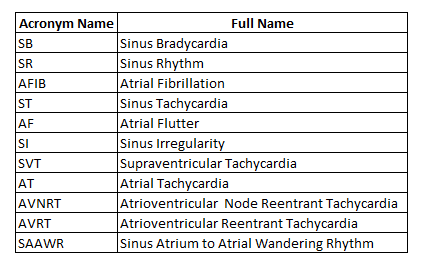

### **Categorías**


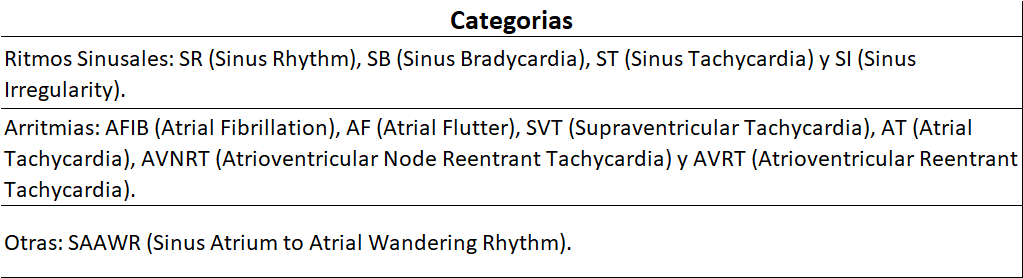

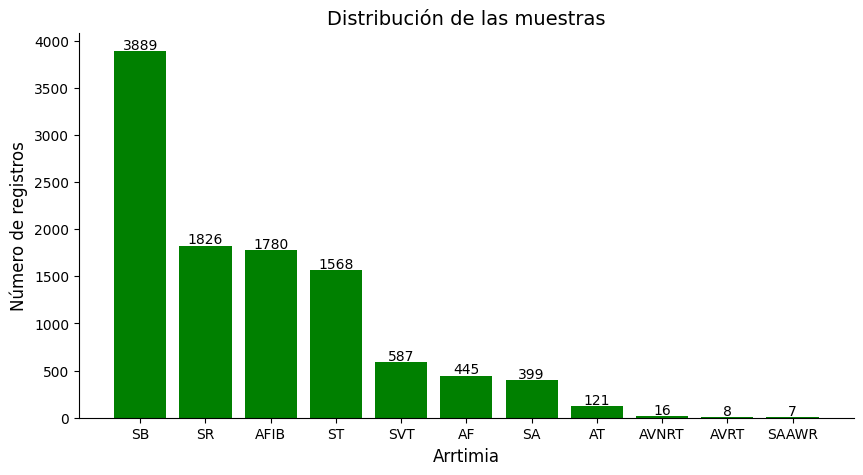

In [ ]:
# Contar los registros por categoría
conteo = df['Rhythm'].value_counts()

# Crear el gráfico de barras y agregar etiquetas
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(conteo.index, conteo.values, color='green')
ax.set_title('Distribución de las muestras', fontsize=14)
ax.set_xlabel('Arrtimia', fontsize=12)
ax.set_ylabel('Número de registros', fontsize=12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Agregar etiquetas con el número de registros
for i, v in enumerate(conteo.values):
    ax.text(i, v + 20, str(v), ha='center', fontsize=10)

plt.show()

## **Métricas de desempeño**
Todas las métricas a utilizar son derivadas de la Matriz de Confusión


* **Exactitud = Accuracy**
</b>
$$\frac{TP + TN}{TP+TN+FP+FN}$$
</b>
* **Precisión = Positive Predictive Value (PPV)** La precisión se refiere a la proporción de verdaderos positivos entre los verdaderos positivos y falsos positivos. Es decir, la precisión mide cuántas de las predicciones positivas son realmente positivas.
</b>
$$\frac{TP}{TP+FP}$$
</b>
* **Sensibilidad (Recall) = True Positive Rate (TPR)** Es la proporción de verdaderos positivos entre los verdaderos positivos y falsos negativos. Es decir, el recall mide cuántas de las observaciones positivas reales fueron una predicción correcta del modelo.
</b>
$$\frac{TP}{TP+FN}$$
</b>
* **F1-score:** Es una media armónica de precisión y recall. Representa una medida equilibrada de precisión y recall. Las más usada es para $\beta = 1$ que le da igual importancia a la Precisión y a la Sensibilidad.
</b>
$$F_\beta = (1+\beta^2) \frac{Precision \cdot Recall}{\beta^2 Precision + Recall}$$
</b>

## **Análisis por categorías**

['AFIB' 'SB' 'SA' 'AF' 'SR' 'ST' 'SVT' 'AT' 'AVNRT' 'SAAWR' 'AVRT']


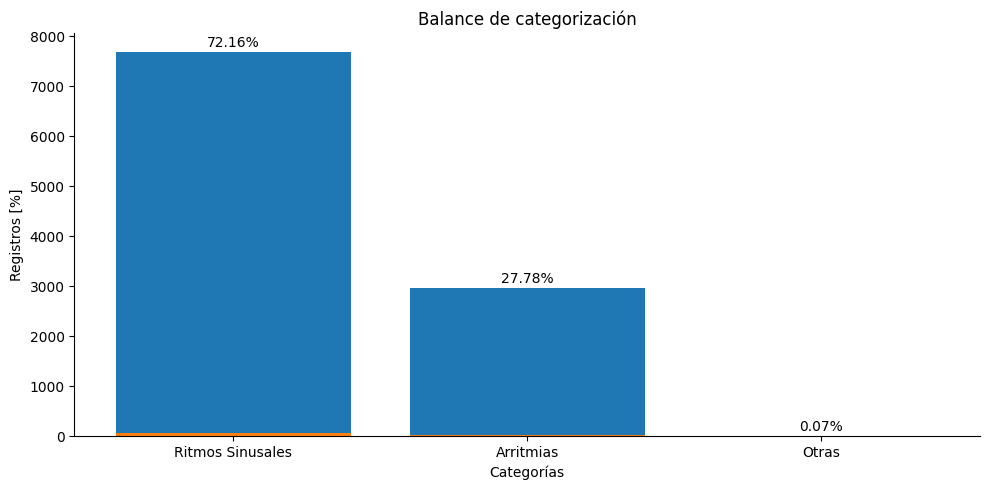

In [ ]:
ritmos_sinusales = ['SR', 'SB', 'ST', 'SI', 'SA']
arritmias = ['AFIB', 'AF', 'SVT', 'AT', 'AVNRT', 'AVRT']
otras_categorias = ['SAAWR']

# Obtengo los valores únicos de la columna 'Rhythm'
valores_rhythm = df['Rhythm'].unique()

# Imprimo los valores para ver si hay valores que no corresponden a ninguna categoría
print(valores_rhythm)

# Compruebo que cada valor en 'Rhythm' esté en una de las categorías definidas
for r in valores_rhythm:
    if r not in ritmos_sinusales + arritmias + otras_categorias:
        print(f'Valor {r} no está en ninguna categoría')

# número de registros en cada categoría
num_registros = [len(df[df['Rhythm'].isin(ritmos_sinusales)]), len(df[df['Rhythm'].isin(arritmias)]),
                 len(df[df['Rhythm'].isin(otras_categorias)])]
categorias = ["Ritmos Sinusales", "Arritmias", "Otras"]

# plot the bar chart
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(categorias, num_registros)

# calcular el porcentaje de registros en cada categoría
total_registros = sum(num_registros)
porcentajes = [round(n / total_registros * 100, 2) for n in num_registros]

# plot the bar chart
plt.bar(categorias, porcentajes)

# add labels and title
plt.xlabel("Categorías")
plt.ylabel("Registros [%]")
plt.title("Balance de categorización")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# agregar etiquetas con el número de registros
for i, v in enumerate(num_registros):
    plt.text(i, v + 100, f"{round(v / sum(num_registros) * 100, 2)}%", color='black', ha='center')

# adjust the layout to avoid cutting off the labels
plt.tight_layout()

# show the plot
plt.show()



### **Correlación**

<ipython-input-10-ce7d377aaf0a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='pearson')


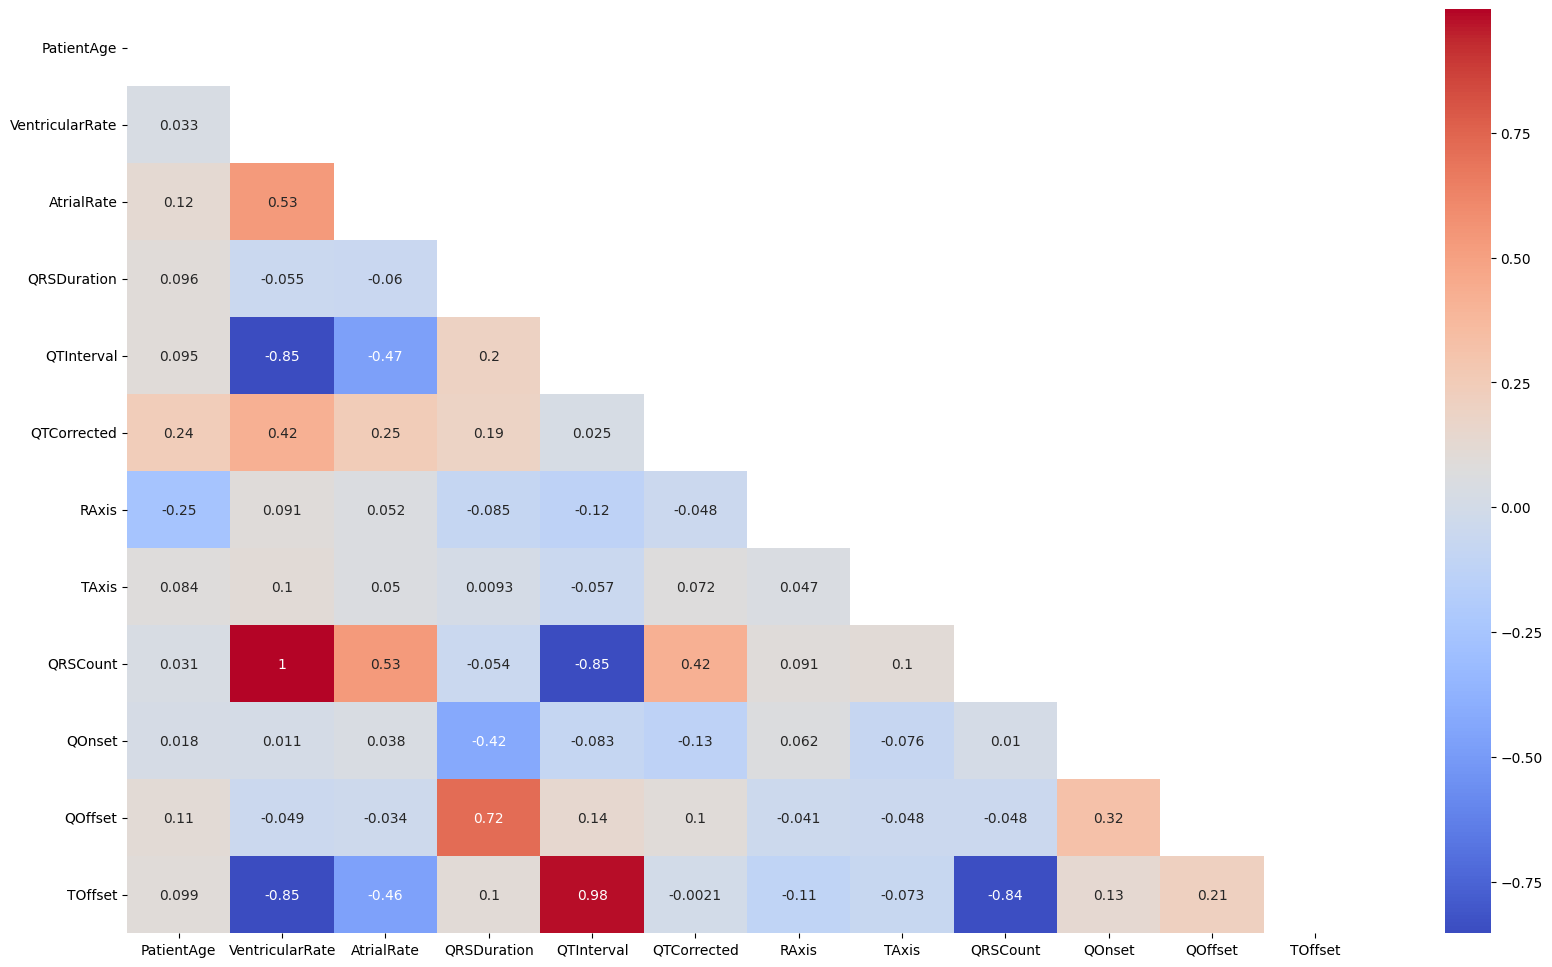

In [ ]:
# Definimos nuestra matriz de correlación
corr_matrix = df.corr(method='pearson')

# Creamos una máscara que filtre la diagonal superior de la matriz (para ignorar duplicados)
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Generamos nuestro heatmap con Seaborn
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", annot=True)
plt.show()

**Análisis valores de correlación altos** Corr > 0.8

* **VentricularRate y QRSCount.** Ambos son parámetros que están relacionados con la contracción del ventrículo, y es común que a mayor frecuencia cardíaca, mayor cantidad de complejos QRS se produzcan en un cierto período de tiempo. Por lo tanto, hay una correlación esperable entre estos dos parámetros.

* **QTInterval y Toffset.** Existe una correlación entre el QTInterval y TOffset porque ambos son medidas que reflejan la duración de diferentes etapas de la actividad eléctrica del corazón. El intervalo QT es la medida desde el inicio del QRS hasta el final de la onda T, lo cual refleja el tiempo total que tarda el corazón en contraerse y luego relajarse durante un latido. Por otro lado, el TOffset es la medición desde el final de la onda T hasta el final del complejo QRS, lo que indica la duración del período de la repolarización ventricular.
Cuando se produce una alteración en la duración de la repolarización (como en el caso de ciertas arritmias o trastornos metabólicos), esto puede afectar tanto al QTInterval como al TOffset. Debido a que estas dos mediciones están estrechamente relacionadas y ambas pueden ser marcadores de cambios en la actividad eléctrica del corazón, es posible que presenten correlación. Además, otros factores (como la edad, el género y las anomalías cardíacas) también pueden influir en la duración del QTInterval y TOffset, lo que podría contribuir aún más a la correlación entre ellos.

## **Entrenamiento**

* RF: RandomForest
* DataFullClass: Datos con todas las clases completas
* DataSubSampling: Datos desbalanceados, se gestiona con submuestreo. [Imbalanced learn - RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)
* DataOverSampling: Datos desbalanceados, se gestiona con técnica de sobremuestreo inteligente, generando datos artificiales para usar en el entrenamiento que sigan la misma distribución de los datos reales: [Synthetic Minority Oversampling Technique (SMOTE)](https://www.jair.org/index.php/jair/article/view/10302/24590) [Imbalanced learn - SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)



### **DATA (sobremuestreo/submuestreo)**

In [ ]:
# Leer el archivo de datos
df = pd.read_excel('Monografia/Diagnostics.xlsx')

# Convertir variables categóricas en numéricas
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))

# Definir variables independientes y dependiente
X = df.drop(['Rhythm'], axis=1)
y = df['Rhythm']
# Separar conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Genera nuevas observaciones sintéticas en las clases minoria
# Aplicar sobremuestreo a la clase minoritaria
smote = SMOTE(sampling_strategy='minority', k_neighbors=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Aplicar submuestreo a la clase mayoritaria
rus = RandomUnderSampler(sampling_strategy='majority')
X_train_subsampled, y_train_subsampled = rus.fit_resample(X_train, y_train)

### **Random Forest**

In [ ]:
# Full class
# Lista de número de árboles a probar
num_trees = [2,5,10,20,50,100, 150,200]
# Lista para almacenar las precisiones
accuracy_scores = []
balanced_accuracy_scores = []
matthews_corrcoefs = []
# Ajustar modelos y calcular la precisión para cada número de árboles
for n in num_trees:
    x=[]
    rf = RandomForestClassifier(n_estimators=n, random_state=0,bootstrap = True,criterion = 'entropy')
    rf.fit(X_train, y_train)
    accuracy_scores.append(rf.score(X_test, y_test))
    # Predecir etapa de arritmia en conjunto de prueba
    y_pred = rf.predict(X_test)
    balanced_accuracy_scores.append(balanced_accuracy_score(y_test,y_pred))
    matthews_corrcoefs.append(matthews_corrcoef(y_test,y_pred))

In [ ]:
#OverSampling
# Lista de número de árboles a probar
num_trees = [2,5,10,20,50,100, 150,200]
# Lista para almacenar las precisiones
acc_resampled = []
baccs_resampled = []
mc_resampled = []
# Ajustar modelos y calcular la precisión para cada número de árboles
for n in num_trees:
    x=[]
    rf = RandomForestClassifier(n_estimators=n, random_state=0,bootstrap = True,criterion = 'entropy')
    rf.fit(X_train_resampled, y_train_resampled)
    acc_resampled.append(rf.score(X_test, y_test))
    # Predecir etapa de arritmia en conjunto de prueba
    y_pred = rf.predict(X_test)
    baccs_resampled.append(balanced_accuracy_score(y_test,y_pred))
    mc_resampled.append(matthews_corrcoef(y_test,y_pred))

In [ ]:
#SubSampling
# Lista de número de árboles a probar
num_trees = [2,5,10,20,50,100, 150,200]
# Lista para almacenar las precisiones
acc_subsampled = []
baccs_subsampled = []
mc_subsampled = []
# Ajustar modelos y calcular la precisión para cada número de árboles
for n in num_trees:
    x=[]
    rf = RandomForestClassifier(n_estimators=n, random_state=0,bootstrap = True,criterion = 'entropy')
    rf.fit(X_train_subsampled, y_train_subsampled)
    acc_subsampled.append(rf.score(X_test, y_test))
    # Predecir etapa de arritmia en conjunto de prueba
    y_pred = rf.predict(X_test)
    baccs_subsampled.append(balanced_accuracy_score(y_test,y_pred))
    mc_subsampled.append(matthews_corrcoef(y_test,y_pred))

**Gráfico de comparación**

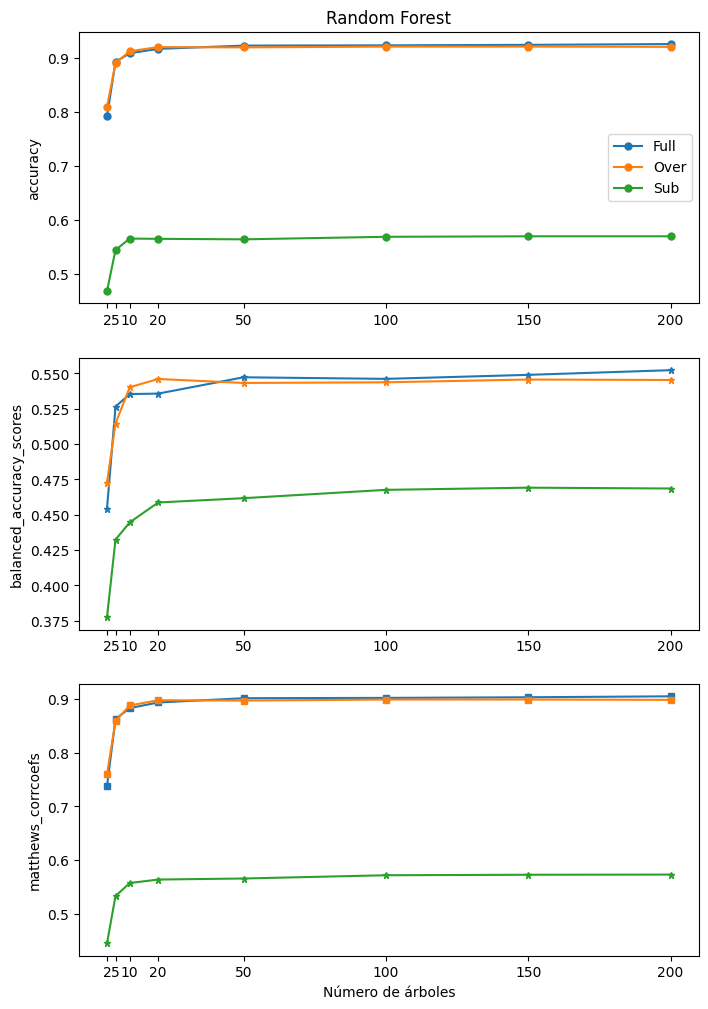

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(8,12))# azul
ax[0].plot(num_trees, accuracy_scores, marker='o', markersize=5)# Texto
ax[0].plot(num_trees, acc_resampled, marker='o', markersize=5)# Texto
ax[0].plot(num_trees, acc_subsampled, marker='o', markersize=5)# Texto
ax[0].set_ylabel('accuracy')
ax[0].legend(['Full','Over','Sub'])
ax[0].set_xticks(num_trees)
ax[0].set_title('Random Forest')

ax[1].plot(num_trees, balanced_accuracy_scores, marker='*', markersize=5)
ax[1].plot(num_trees, baccs_resampled, marker='*', markersize=5)
ax[1].plot(num_trees, baccs_subsampled, marker='*', markersize=5)
ax[1].set_ylabel('balanced_accuracy_scores')
ax[1].set_xticks(num_trees)

ax[2].plot(num_trees, matthews_corrcoefs, marker='s', markersize=5)
ax[2].plot(num_trees, mc_resampled, marker='s', markersize=5)
ax[2].plot(num_trees, mc_subsampled, marker='*', markersize=5)
ax[2].set_ylabel('matthews_corrcoefs')
ax[2].set_xticks(num_trees)
ax[2].set_xlabel('Número de árboles')

plt.show()


**Matriz confusión mejor modelo**

Confusion matrix, without normalization


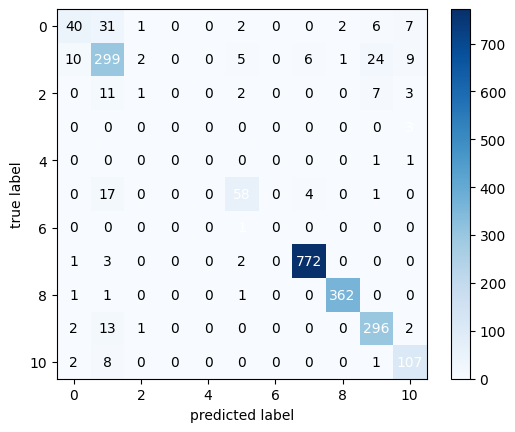

Normalized confusion matrix


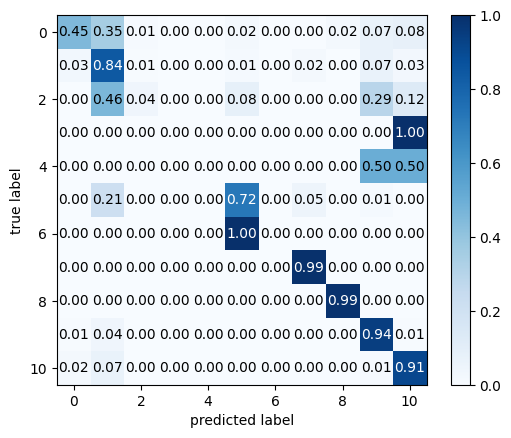

'rf_tree.pdf'

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

titles_options = [("Confusion matrix, without normalization", True, False),
                  ("Normalized confusion matrix", False, True)]

#class_names=['class_1','class_2','class_3','class_4','class_5','class_6','class_7','class_8','class_9','class_10','class_11']

n=10
rf = RandomForestClassifier(n_estimators=n, random_state=42,bootstrap = True,criterion = 'entropy')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

multiclass = confusion_matrix(y_test, y_pred)
for title, absolute, normalize in titles_options:
     fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                colorbar=True,
                                show_absolute=absolute,
                                show_normed=normalize)
     print(title)
     plt.show()

# Seleccionar el primer árbol de decisión del modelo
tree = rf.estimators_[0]

# Exportar el árbol en formato DOT
dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, class_names=y.astype(str).unique().tolist(), filled=True, rounded=True, special_characters=True)

# Visualizar el árbol
graph = graphviz.Source(dot_data)
graph.render("rf_tree") # Guardar el árbol como archivo PDF

### **LGBM**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

# Leer el archivo de datos
df = pd.read_excel('Monografia/Diagnostics.xlsx')

# Convertir variables categóricas en numéricas
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))

# Definir variables independientes y dependiente
X = df.drop(['Rhythm'], axis=1)
y = df['Rhythm']

# Separar conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir los parámetros del modelo
params = {
    'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.1,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 100,
    'n_jobs': -1,
    'num_leaves': 31,
    'objective': None,
    'random_state': 7579,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'silent': 'warn',
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0
}

# Crear una instancia del clasificador LGBM
lgbm = LGBMClassifier(**params)

# Entrenar el modelo
lgbm.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = lgbm.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, lgbm.predict_proba(X_test), multi_class='ovr')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprimir los resultados del modelo
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Recall:", recall)
print("Precision:", precision)
print("F1-score:", f1)


Accuracy: 0.935680751173709
AUC: 0.9673107594492908
Recall: 0.935680751173709
Precision: 0.9290170369031404
F1-score: 0.930623706736778


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **SVM**

In [ ]:
# SVM
# OVR
# en esta estrategia se realizar una SVM por cada clase
# por lo tanto tenemos que acceder a cada una de la SVM
# OVO
# solo tenemos una SVM
kernels=['linear', 'rbf']
gammas = [1, 0.1, 0.01]
params_reg = [0.001, 0.01,0.1, 1.0,10] # C
muestreo = ['','_resampled','_subsampled'] # corresponden a ['none','over','sub']

idx = 0
resultados = pd.DataFrame()

parameters = {'kernel':kernels, 'C':params_reg,'gamma':gammas}
svm = SVC()
grid_search = GridSearchCV(svm, parameters, cv=5, refit = True)

for sample_idx in muestreo:
        Xtrain = eval(f'X_train{sample_idx}')
        Ytrain = eval(f'y_train{sample_idx}')
        print("Muestreo: ", sample_idx)
        # entrenamiento
        grid_search.fit(Xtrain, Ytrain)
        rst=pd.Series(grid_search.best_params_)
        resultados.loc[idx,'kernel'] = rst['kernel']
        resultados.loc[idx,'gamma'] = rst['gamma']
        resultados.loc[idx,'param_reg'] = rst['C']
        resultados.loc[idx,'accuracy'] = grid_search.best_score_
        resultados.loc[idx,'muestreo'] = sample_idx
        resultados.loc[idx,'estimator'] = grid_search.best_estimator_
        idx+=1

# grid_predictions = grid_search.predict(X_test)
# print classification report
# print(classification_report(y_test, grid_predictions))
# print(confusion_matrix(y_test,grid_predictions))


Muestreo:  
Muestreo:  _resampled


In [ ]:
# ver los resultados
resultados.sort_values('accuracy',ascending=False)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1, figsize=(8, 12))

# Gráfica 1: Accuracy
ax[0].plot(resultados[resultados['muestreo']=='']['param_reg'], resultados[resultados['muestreo']=='']['accuracy'], marker='o', markersize=5)
ax[0].plot(resultados[resultados['muestreo']=='_resampled']['param_reg'], resultados[resultados['muestreo']=='_resampled']['accuracy'], marker='o', markersize=5)
ax[0].plot(resultados[resultados['muestreo']=='_subsampled']['param_reg'], resultados[resultados['muestreo']=='_subsampled']['accuracy'], marker='o', markersize=5)
ax[0].set_ylabel('accuracy')
ax[0].legend(['None', 'Over', 'Sub'])
ax[0].set_xscale('log')
ax[0].set_title('SVM')

# Gráfica 2: Balanced Accuracy Scores
ax[1].plot(resultados[resultados['muestreo']=='']['param_reg'], resultados[resultados['muestreo']=='']['balanced_accuracy_scores'], marker='*', markersize=5)
ax[1].plot(resultados[resultados['muestreo']=='_resampled']['param_reg'], resultados[resultados['muestreo']=='_resampled']['balanced_accuracy_scores'], marker='*', markersize=5)
ax[1].plot(resultados[resultados['muestreo']=='_subsampled']['param_reg'], resultados[resultados['muestreo']=='_subsampled']['balanced_accuracy_scores'], marker='*', markersize=5)
ax[1].set_ylabel('balanced_accuracy_scores')
ax[1].set_xscale('log')

# Gráfica 3: Matthews Correlation Coefficients
ax[2].plot(resultados[resultados['muestreo']=='']['param_reg'], resultados[resultados['muestreo']=='']['matthews_corrcoefs'], marker='s', markersize=5)
ax[2].plot(resultados[resultados['muestreo']=='_resampled']['param_reg'], resultados[resultados['muestreo']=='_resampled']['matthews_corrcoefs'], marker='s', markersize=5)
ax[2].plot(resultados[resultados['muestreo']=='_subsampled']['param_reg'], resultados[resultados['muestreo']=='_subsampled']['matthews_corrcoefs'], marker='*', markersize=5)
ax[2].set_ylabel('matthews_corrcoefs')
ax[2].set_xscale('log')
ax[2].set_xlabel('Parámetro C')

plt.tight_layout()
plt.show()

### **SUMMARY**

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Leer el archivo de datos
df = pd.read_excel('Monografia/Diagnostics.xlsx')

# Convertir variables categóricas en numéricas
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))

# Definir variables independientes y dependiente
X = df.drop(['Rhythm'], axis=1)
y = df['Rhythm']

# Separar conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=0)

# Definir modelos
models = {
    'Random Forest': RandomForestClassifier(random_state=0),
    'SVM': SVC(kernel='rbf', C=1.0, random_state=0),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(random_state=0)
}

# Entrenar modelos y obtener métricas
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-score'].append(f1)

# Convertir resultados a DataFrame
df_results = pd.DataFrame(results)

# Presentar resultados en una tabla
print(df_results)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 Model  Accuracy  Precision    Recall  F1-score
0        Random Forest  0.919718   0.910091  0.919718  0.911075
1                  SVM  0.612207   0.488806  0.612207  0.520024
2                  KNN  0.807042   0.798432  0.807042  0.789953
3  Logistic Regression  0.746948   0.733254  0.746948  0.719048


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Comparar Modelos**

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00

In [ ]:
!pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.7-py3-none-any.whl size=143860 sha256=08397a5b251d445dc4f91d3394ee5849756ee4d7d2d62634a385c0ff884e5c9c
  Stored in directory: /root/.cache/pip/wheels/a

In [ ]:
from pycaret.classification import *

# Cargar los datos
data = pd.read_excel('Monografia/Diagnostics.xlsx')

# Configurar el entorno de PyCaret e inicializar la configuración de clasificación
clf = setup(data=data, target='Rhythm', train_size=0.8, normalize=True, experiment_name='comparacion_modelos')

# Comparar los modelos
mejor_modelo = compare_models()

# Imprimir el mejor modelo
print(mejor_modelo)

,Description,Value
0,Session id,6446
1,Target,Rhythm
2,Target type,Multiclass
3,Target mapping,"AF: 0, AFIB: 1, AT: 2, AVNRT: 3, AVRT: 4, SA: 5, SAAWR: 6, SB: 7, SR: 8, ST: 9, SVT: 10"
4,Original data shape,"(10646, 16)"
5,Transformed data shape,"(10646, 16)"
6,Transformed train set shape,"(8516, 16)"
7,Transformed test set shape,"(2130, 16)"
8,Ordinal features,1
9,Numeric features,12


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7118,0.4395,0.7118,0.6970,0.6759,0.6204,0.6297,0.9830
ridge,Ridge Classifier,0.6008,0.0000,0.6008,0.5380,0.5084,0.4612,0.4903,0.4420
lr,Logistic Regression,0.5929,0.4488,0.5929,0.5630,0.5455,0.4828,0.5034,2.8570
et,Extra Trees Classifier,0.5844,0.4673,0.5844,0.7099,0.5492,0.4733,0.4945,1.5940
svm,SVM - Linear Kernel,0.5405,0.0000,0.5405,0.5938,0.5418,0.4276,0.4460,0.8630
ada,Ada Boost Classifier,0.4534,0.3239,0.4534,0.3493,0.3725,0.3206,0.4083,1.4490
dummy,Dummy Classifier,0.3653,0.2500,0.3653,0.1335,0.1955,0.0000,0.0000,0.4450
rf,Random Forest Classifier,0.3054,0.4451,0.3054,0.5913,0.3375,0.2188,0.2524,1.7760
lightgbm,Light Gradient Boosting Machine,0.2629,0.3391,0.2629,0.3750,0.2453,0.1323,0.1722,2.8510
nb,Naive Bayes,0.2341,0.2607,0.2341,0.1521,0.1842,0.0365,0.0468,0.6640


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


### **Prueba realizada por Maria Bernarda**

In [ ]:
def getLabelCount(df,target):
    return sorted([( labelValue,len(df.loc[df[target] == labelValue]) ) for labelValue in df[target].unique()])

In [ ]:
from imblearn.combine import *
# Leer el archivo de datos
df = pd.read_excel('Monografia/Diagnostics.xlsx')

# Convertir variables categóricas en numéricas
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))

# Definir variables independientes y dependiente
X = df.drop(['Rhythm'], axis=1)
y = df['Rhythm']
# Separar conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

In [ ]:
# Conteo desbalance de clases
print('Desbalance de clases:')
getLabelCount(df,'Rhythm')
# Balance de clases
smote = SMOTE(sampling_strategy='all')
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)
pd.Series(y_train_over).value_counts()
# Definir nuevo data
df = X_train_over
df['Rhythm'] = y_train_over
# chequear que haya balance de clases
print('Balance de clases:')
getLabelCount(df,'Rhythm')

[(0, 3111),
 (1, 3111),
 (2, 3111),
 (3, 3111),
 (4, 3111),
 (5, 3111),
 (6, 3111),
 (7, 3111),
 (8, 3111),
 (9, 3111),
 (10, 3111)]

In [ ]:
from pycaret.classification import *

# Configurar el entorno de PyCaret e inicializar la configuración de clasificación
clf = setup(data=df, target='Rhythm', train_size=0.8, normalize=True, experiment_name='comparacion_modelos_2', fix_imbalance=True,fix_imbalance_method=smote)

# Comparar los modelos
mejor_modelo = compare_models()

# Imprimir el mejor modelo
print(mejor_modelo)

,Description,Value
0,Session id,7579
1,Target,Rhythm
2,Target type,Multiclass
3,Original data shape,"(34221, 16)"
4,Transformed data shape,"(34224, 16)"
5,Transformed train set shape,"(27379, 16)"
6,Transformed test set shape,"(6845, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9797,0.9994,0.9797,0.9796,0.9795,0.9776,0.9776,6.2140
xgboost,Extreme Gradient Boosting,0.9795,0.9994,0.9795,0.9795,0.9794,0.9775,0.9775,29.2520
et,Extra Trees Classifier,0.9717,0.9990,0.9717,0.9717,0.9713,0.9689,0.9689,4.0510
rf,Random Forest Classifier,0.9705,0.9988,0.9705,0.9705,0.9702,0.9675,0.9676,5.1220
dt,Decision Tree Classifier,0.9317,0.9625,0.9317,0.9316,0.9314,0.9249,0.9250,0.9230
gbc,Gradient Boosting Classifier,0.9268,0.9959,0.9268,0.9264,0.9260,0.9194,0.9195,71.7070
knn,K Neighbors Classifier,0.9098,0.9880,0.9098,0.9101,0.9075,0.9008,0.9013,2.0960
qda,Quadratic Discriminant Analysis,0.7580,0.9601,0.7580,0.7807,0.7504,0.7338,0.7389,0.2510
lr,Logistic Regression,0.7413,0.9607,0.7413,0.7320,0.7329,0.7154,0.7161,5.2260
svm,SVM - Linear Kernel,0.6794,0.0000,0.6794,0.6782,0.6622,0.6474,0.6503,2.5930


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7579, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
